## Processamento de Linguagem Natural no YouTube com spaCy

Processamento de Linguagem Natural ou NLP ***(Natural Language Processing)*** é uma sub-área da Inteligência Artificial que concentra os esforços em **desenvolver a capacidade de computadores compreenderem a linguagem utilizada por nós**, seres humanos.

Neste projeto, será abordado a biblioteca spaCy para Processamento de Linguagem Natural em vídeos no YouTube, as seguintes etapas serão realizadas:  
* **Extração de dados do YouTube**
* **Entity Recogntion** *(Cidades, pessoas, eventos, organizações..)*
* **Part-of-Speech Tagging**
* **Dependency Parser**

<img src="nlp.png" width="800" height="800"/>

**Spacy** é um framework para processamento de linguagem natural, seu uso é facilitado através de modelos pré-treinados com suporte para 16 idiomas, incluindo português. O modelo pré-treinado no idioma português possui as seguintes features: Named Entity Recognition, Part-of-Speech Tagging e Dependency Parser. Em 2015, o spaCy foi confirmado como o **analisador sintático mais rápido do mundo** e com precisão entre melhores disponíveis.

### Bibliotecas   
Iremos exportar todas as dependências necessárias para o desenvolvimento do projeto.

In [153]:
import spacy
import re
import matplotlib.pyplot as plt
from pytube import YouTube
from IPython.core.display import display, HTML
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

### Captura de Dados do YouTube   
A biblioteca [**pytube**](https://python-pytube.readthedocs.io/en/latest/) nos permite realizar o download de vídeos do YouTube, além de diversas informações, como visualizações, nota e legenda, entre outras. Iremos analisar o conteúdo do vídeo através da legenda automática gerada pelo próprio google. Será utilizado para análise um [vídeo](https://www.youtube.com/watch?v=taA48BInC6s&list=PLgJ7b1NurjD2oN5ZXbKbPjuI04d_S0V1K&index=60) do canal [Expedia](https://www.youtube.com/channel/UCbwz3lN4GOm6G_RaGW0RE6A) sobre a cidade do Rio de Janeiro.

In [194]:
link = 'https://www.youtube.com/watch?v=taA48BInC6s&list=PLgJ7b1NurjD2oN5ZXbKbPjuI04d_S0V1K&index=60'
source = YouTube(link)

Primeiramente, precisamos especificar o idioma que desejamos trabalhar, neste caso iremos obter a legenda gerada para o português. Em seguida, armazenamos a legenda convertida para srt em sub_pt.

In [229]:
pt_caption = source.captions.get_by_language_code('pt-BR')
sub_pt = pt_caption.generate_srt_captions()
sub_pt.split('\n')[:8]

C:\Users\Bruno\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function get_by_language_code (This object can be treated as a dictionary, i.e. captions['en']).
  """Entry point for launching an IPython kernel.


['1',
 '00:00:05,270 --> 00:00:11,290',
 'Localizada na região sudeste do Brasil, a cidade do Rio de Janeiro é um dos centros mais alegres e vibrantes da ',
 '',
 '2',
 '00:00:11,290 --> 00:00:12,420',
 'América do Sul. ',
 '']

Podemos observar acima que a legenda extraída contém a marcação de tempo do início e fim de cada sentença, essa marcação não será útil para nós neste projeto, portanto iremos removê-lá.

In [203]:
result = re.findall("(\d+:\d+:\d+,\d+ --> \d+:\d+:\d+,\d+)\s+(.+)", sub_pt)
text = [result[i][1] for i in range(len(result))]
text = ''.join(text)

<>:1: DeprecationWarning: invalid escape sequence \d
<>:1: DeprecationWarning: invalid escape sequence \d
<>:1: DeprecationWarning: invalid escape sequence \d
<ipython-input-203-1619b13a595e>:1: DeprecationWarning: invalid escape sequence \d
  result = re.findall("(\d+:\d+:\d+,\d+ --> \d+:\d+:\d+,\d+)\s+(.+)", sub_pt)


### SpaCy
O modelo pré-treinado com suporte para o português não está incluso por padrão, necessitando ser instalado separadamente. O modelo pode ser baixado e importado seguindo os passos abaixo:  

<img src="model_pt.svg" width="300" height="300" align='left'/>

In [124]:
nlp_pt = spacy.load('pt_core_news_sm')

* **Tokenização**  
No processo de tokenização, cada elemento da sentença é divido em tokens, representando palavras, pontuações, números, entre outros elementos presente na sentença. 
O objeto Doc é uma sequência de tokens, onde cada token possuí diversos atributos.

In [206]:
doc = nlp_pt(text)
#Retornando os 25 primeiros tokens
doc[:25]

Localizada na região sudeste do Brasil, a cidade do Rio de Janeiro é um dos centros mais alegres e vibrantes da América do Sul

### Named Entity Recognition
A tarefa de Reconhecimento de Entidades Mencionadas (Named Entity Recognition) tem o objetivo de localizar e classificar elementos do texto em categorias pré-definidas, como pessoas, lugares, organizações, data e outras categorias de interesse.

Os modelos disponíveis para idioma português reconhecem as seguintes entidades:
* **PER**: nome de pessoa ou família;
* **LOC**: localização política ou geográfica;
* **ORG**: entidade corporativa, governamental ou organizacional;
* **MISC**: entidades diversas, como eventos, produtos, nacionalidades, entre outros.

Modelos disponíveis para a língua inglesa são mais complexos e capazes de identificar uma gama maior de entidades.  

A seguir, iremos extrair as entidades do vídeo e separá-las em seus respectivos grupos.

In [208]:
loc = [entity for entity in doc.ents if entity.label_ == 'LOC']
per = [entity for entity in doc.ents if entity.label_ == 'PER']
org = [entity for entity in doc.ents if entity.label_ == 'ORG']
misc = [entity for entity in doc.ents if entity.label_ == 'MISC']

Entidades identificadas:

* **Pessoas**  

In [209]:
spacy.displacy.render(per, style="ent")

* **Localidades**

In [210]:
spacy.displacy.render(loc, style="ent")

* **Organizações**

In [211]:
spacy.displacy.render(org, style="ent")

O modelo não foi capaz de reconhecer com exatidão as organizações, considerando eventos como o Carnaval e Ano Novo, famosos no Rio de Janeiro como organizações. Uma grande vantagem da biblioteca spaCy é a possibilidade de aprimorar o modelo para um propósito especifico, incluindo novos exemplos para o aprendizado do modelo. Para mais informações, acesse a [documentação](https://spacy.io/usage/training) disponível.

* **Diversas**

In [212]:
spacy.displacy.render(misc, style="ent")

* **Conteúdo completo**  
Todo o conteúdo do vídeo, assim como todas as entidades identificadas podem ser visualizadas abaixo:

In [213]:
spacy.displacy.render(doc, style="ent")

### Part-of-Speech Tagging   
O processo de POS Tagging é responsável por identificar e rotular elementos do texto, a fim de compreender a estrutura gramatical. Para facilitar a visualização, iremos aplicar a técnica em um pequeno conjunto nos dados, mais espeficamente nos primeiros 25 *tokens*.

In [216]:
for token in doc[:25]:
    print(token.text, token.pos_)

Localizada VERB
na DET
região NOUN
sudeste ADJ
do DET
Brasil PROPN
, PUNCT
a DET
cidade NOUN
do DET
Rio PROPN
de ADP
Janeiro PROPN
é AUX
um NUM
dos ADP
centros NOUN
mais ADV
alegres ADJ
e CCONJ
vibrantes NOUN
da DET
América PROPN
do DET
Sul PROPN


Como podemos observar, o modelo foi capaz de identificar os verbos, advérvios, adjetivos, pontuações, entre outras classes gramaticais. Essa identificação será muito útil para próxima etapa, Dependency Parser!

### Dependency Parser

Neste processo é possível identificar as depêndencias do texto através da relação entre as classes gramaticais. Como no exemplo anterior, a fim de simplificar a visualização, vamos verificar as relações em um pequeno conjunto dos dados.

In [218]:
spacy.displacy.render(doc[:25], style="dep")

### Visão geral  
Com o objetivo de fornecer uma visão geral e intuitiva do conteúdo do vídeo foi utilizada uma representação em nuvem de palavras ***(wordcloud)***. A nuvem de palavras é um método de visualização atrativo para textos, descrevendo as palavras mais frequentemente utilizadas na base de dados. A frequência de uso de uma palavra está correlacionada com o tamanho de sua fonte. Nosso objetivo é verificar palavras relevantes utilizadas com frequência no vídeo, portanto iremos remover as ***stopwords***.

**Stopwords** são palavras consideradas irrelevantes para compreensão da frase, normalmente são consideradas stopwords preposições, pronomes, artigos e interjeições.

* **Removendo Stopwords**

In [219]:
text_without_stop = [str(token) for token in doc if token.is_stop == False]
text_without_stop = ' '.join(text_without_stop)
cleaned_text = re.sub(r"[\.',\[\]]", "",str(text_without_stop))

* **Gerando WordCloud**

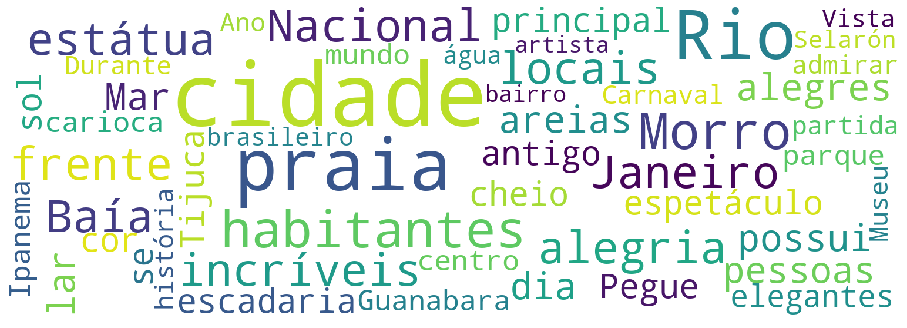

In [222]:
n = 50
wordcloud = WordCloud(max_font_size=150,width = 1520, height = 535, background_color='white', max_words=n).generate(str(cleaned_text))
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Referências
* [Reconhecimento de entidades mencionadas em português utilizando aprendizado de máquina](https://teses.usp.br/teses/disponiveis/45/45134/tde-23052013-104248/pt-br.php)
* [Modelos de Predição Estruturada em Part-of-Speech Tagging para Português do Brasil](https://www.researchgate.net/publication/273141061_Modelos_de_Predicao_Estruturada_em_Part-of-Speech_Tagging_para_Portugues_do_Brasil)
* [SpaCy Documentation](https://spacy.io/usage/spacy-101)
* [Natural Language Processing com a biblioteca spaCy](https://medium.com/@dehhmesquita/natural-language-processing-com-a-biblioteca-spacy-f324a9eeb8dc)

Deixa sua crítica ou sugestão e me ajude a evoluir😉
* [LinkedIn](https://www.linkedin.com/in/bruno-dorneles/)
* [GitHub](https://github.com/BrunoDorneles)